## Lectures 3, 4: InsertionSort vs MergeSort & Common running time functions

In [13]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

## InsertionSort
We have two alternative implementations of InsertionSort. One is recursive, the other one is nonrecursive. Let's start with the recursive implementation.

In [14]:
def recInsertionSort(A,n):
    # base case
    if n == 1:
        return
    else:
        # recursively sort first n-1 elements
        recInsertionSort(A, n - 1)    
        # Insert nth item into its correct position
        temp = A[n]
        while (n > 1 and A[n-1] > temp):
            A[n] = A[n-1]
            n = n - 1
        A[n] = temp
        
def recInsertionSortW(A):
    recInsertionSort(A, len(A)-1)        

In [15]:
A = [float('-inf'),18,7,4,9,10,45,15] # array indexed 1 to n, A[0] is just place holder.
recInsertionSortW(A)
print(A)

[-inf, 4, 7, 9, 10, 15, 18, 45]


Now let's see the nonrecursive implementation of InsertionSort. 

In [16]:
def InsertionSort(A,n):
    for i in range(2,n+1):
        temp = A[i]
        while (i > 1 and A[i-1] > temp):
            A[i] = A[i-1]
            i = i - 1
        A[i] = temp
        
def InsertionSortW(A):
    InsertionSort(A, len(A)-1)        

In [17]:
A = [float('-inf'),18,7,4,9,10,45,15]
InsertionSortW(A)
print(A)

[-inf, 4, 7, 9, 10, 15, 18, 45]


## MergeSort

Implementation of MergeSort similar to the pseudocode we have seen in class.

In [18]:
# merge two sorted arrays to return a sorted array
def merge(A, l, m, r):
    # copy left and right parts of A into new arrays
    AL = []
    for i in range(m-l+1):
        AL.append(A[l+i])
    AL.append(float('inf'))   
    AR = []
    for i in range(r-m):
        AR.append(A[m+i+1])
    AR.append(float('inf'))
    
    indexL = 0
    indexR = 0
    for i in range(l, r+1):
        if (AL[indexL]<=AR[indexR]):
            A[i] = AL[indexL]
            indexL += 1
        else:
            A[i] = AR[indexR]
            indexR += 1
        
def mergeSort(A, left, right):
    if (left < right):
        middle = (left+right) // 2
        mergeSort(A, left, middle)
        mergeSort(A, middle+1, right)
        merge (A, left, middle, right)
        
def mergeSortW(A):
    mergeSort(A, 0, len(A)-1)        

In [19]:
A = [50, 15, 3, 34, 10, 2, 100, 20]
mergeSortW(A)
print(A)

[2, 3, 10, 15, 20, 34, 50, 100]


## Comparison of Execution Times
Let's record the execution times of InsertionSort implementations and MergeSort implementation on varying size input instances. This piece of code is from http://web.stanford.edu/class/cs161/index.html

In [20]:
import time
from random import choice

# This piece of code is from http://web.stanford.edu/class/cs161/index.html
# tryItABunch: runs a function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input a list of integers
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - startN: smallest n to test
#    - endN: largest n to test
#    - stepSize: test n's in increments of stepSize between startN and endN
#    - numTrials: for each n tests, do numTrials tests and average them
#    - listMax: the input lists of length n will have values drawn uniformly at random from range(listMax)
def tryItABunch(myFn, startN=10, endN=100, stepSize=10, numTrials=20, listMax = 10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst = [ choice(range(listMax)) for i in range(n) ] # generate a random list of length n
            lst.insert(0,float('-inf'))
            start = time.time()
            myFn(lst)
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

nValuesRec, tValuesRec = tryItABunch( recInsertionSortW, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 20)
nValues, tValues = tryItABunch( InsertionSortW, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 20) 
nValuesMerge, tValuesMerge = tryItABunch( mergeSortW, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 20)

Text(0.5, 1.0, 'InsertionSort vs MergeSort')

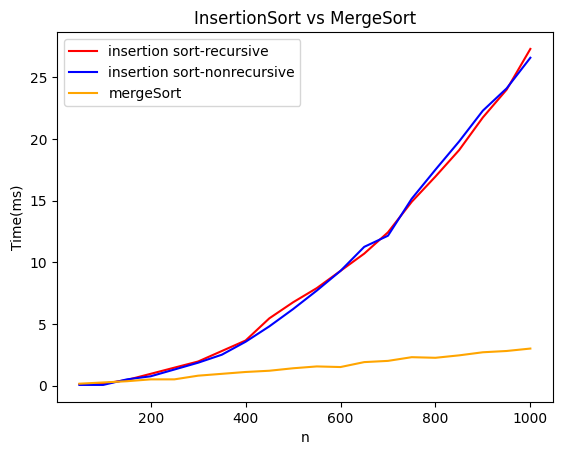

In [21]:
plt.plot(nValuesRec, tValuesRec, color="red", label="insertion sort-recursive")
plt.plot(nValues, tValues, color="blue", label="insertion sort-nonrecursive")
plt.plot(nValuesMerge, tValuesMerge, color="orange", label="mergeSort")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("InsertionSort vs MergeSort")

## Plots of Some Common Functions
Compare the above plot with the one below where we draw some common running time functions (some functions such as n and nlogn are multiplied with a constant factor for better visualization purposes). 

Text(0.5, 1.0, 'n^3, n^2, nlog(n), and n')

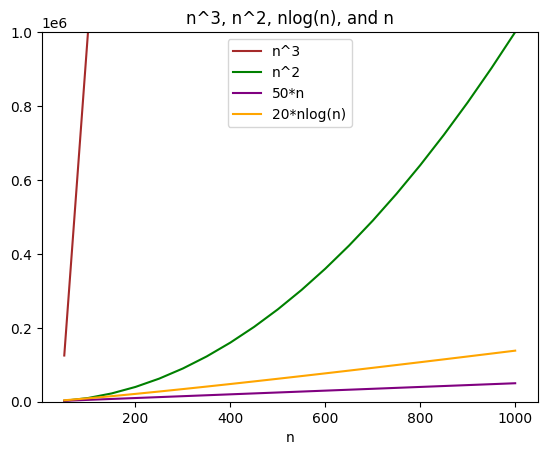

In [22]:
plt.plot(nValuesMerge, [x**3 for x in nValuesMerge], color="brown", label="n^3")
plt.plot(nValuesMerge, [x**2 for x in nValuesMerge], color="green", label="n^2")
plt.plot(nValuesMerge, [50*x for x in nValuesMerge], color="purple", label="50*n")
plt.plot(nValuesMerge, [20*x*np.log(x) for x in nValuesMerge], color="orange", label="20*nlog(n)")
plt.xlabel("n")
plt.ylim(0,1000000)
plt.legend()
plt.title("n^3, n^2, nlog(n), and n")

The plot below depicts n^2, nlogn, and n in more detail. 

Text(0.5, 1.0, 'n^2, nlogn, and n')

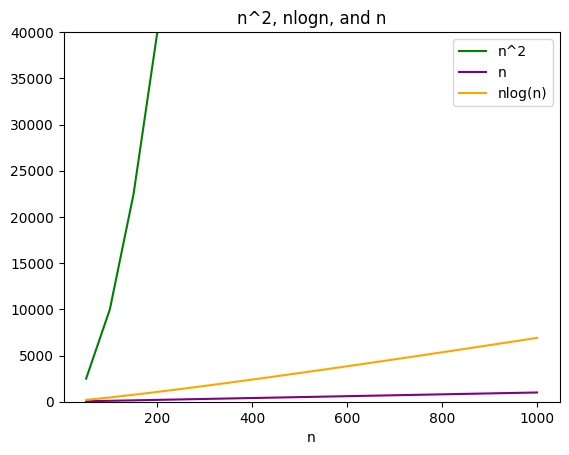

In [23]:
plt.plot(nValuesMerge, [x**2 for x in nValuesMerge], color="green", label="n^2")
plt.plot(nValuesMerge, [x for x in nValuesMerge], color="purple", label="n")
plt.plot(nValuesMerge, [x*np.log(x) for x in nValuesMerge],  color="orange", label="nlog(n)")
plt.xlabel("n")
plt.ylim(0,40000)
plt.legend()
plt.title("n^2, nlogn, and n")